In [14]:
import numpy as np
from numpy import random
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math
import sys 
import shutil
from sklearn.metrics import mean_squared_error
from datetime import datetime
from pandas import read_csv
#from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit # or StratifiedShuffleSplit
from pandas import DataFrame
from pandas import DataFrame
import sktime
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from scipy.signal import find_peaks
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [15]:
#Data location
# pathON="/home/becherin/UDP/PierreDeVitry/LC/interpo_ONOFF/Luigino/ON_data/"
# pathOFF="/home/becherin/UDP/PierreDeVitry/LC/interpo_ONOFF/Luigino/OFF_data/"

pathON="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/Luigino/ON_data/"
pathOFF="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/Luigino/OFF_data/"

# pathON="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/one_degree/ON_data/"
# pathOFF="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/one_degree/OFF_data/"

# pathON="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/two_five/ON_data/"
# pathOFF="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/two_five/OFF_data/"

# pathON="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/two_five_gold/ON_data/"
# pathOFF="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/two_five_gold/OFF_data/"

#pathON="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/three_five_gold/ON_data/"
#pathOFF="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/three_five_gold/OFF_data/"

# pathON="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/four/ON_data/"
# pathOFF="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/four/OFF_data/"


# pathON="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/two_err_bronze/ON_data/"
# pathOFF="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/two_err_bronze/OFF_data/"

# pathON="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/four_err_bronze/ON_data/"
# pathOFF="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/four_err_bronze/OFF_data/"

# pathON="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/one_err_bronze/ON_data/"
# pathOFF="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/one_err_bronze/OFF_data/"

In [16]:
#Storing in a list the adresses of all the data files in the notebook

data_files_ON=[]
file_names_ON=[]

data_files_OFF=[]
file_names_OFF=[]
data_files_ALL=[]
file_names_ALL=[]

#Storing in a list the adresses of all the data files in the notebook
for filename in os.listdir(pathOFF):
    f = os.path.join(pathOFF,filename)
    if os.path.isfile(f):
        data_files_OFF.append(f)
        file_names_OFF.append(filename)
        data_files_ALL.append(f)
        file_names_ALL.append(filename)
for filename in os.listdir(pathON):
    f = os.path.join(pathON,filename)
    if os.path.isfile(f):
        data_files_ON.append(f)
        file_names_ON.append(filename)
        data_files_ALL.append(f)
        file_names_ALL.append(filename)     

In [17]:

#Filling arrays with ON class data and OFF class data
binning=37

dataON=[]
dataOFF=[]

for i in range(len(data_files_OFF)):

    dataOFF.append(data_files_OFF[i])

for i in range(len(data_files_ON)):

    dataON.append(data_files_ON[i])


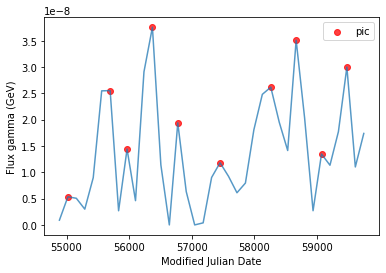

In [18]:
dataframe=pd.read_csv(dataOFF[78],index_col=[0])
dataframe.columns=['MJD','Flux','Delta Flux','Photon Index','Delta Index','TS','fratio']

time=np.array(dataframe['MJD'])
array=np.array(dataframe['Flux'])
delta_flux=np.array(dataframe['Delta Flux'])

indices = find_peaks(array)

#Formatting indices array - last element is a tuple
indices=np.delete(indices,-1)

#Geetting peak magnitudes and corresponding times
y=[array[j] for j in indices]
x=[time[j] for j in indices]

#Formatting arrays
x=np.hstack(x)
y=np.hstack(y)

plt.plot(time,array,alpha=0.75)
plt.scatter(x,y,color='r',alpha=0.75, label='pic')
plt.xlabel('Modified Julian Date')
plt.ylabel('Flux gamma (GeV)')
plt.legend()

In [19]:

def peak_study(array,time,delta_array):    

    #<Getting indices of  peaks
    indices = find_peaks(array)
    #Formatting indices array - last element is a tuple
    indices=np.delete(indices,-1)
    
    #Scaling the lightcurve to the lightcurve
    scaler = MinMaxScaler()
    array2=array.reshape(-1,1)
    scaler.fit(array2)
    array2=scaler.transform(array2)
    
    #Scaling the MJD 
    scaler = MinMaxScaler()
    time2=time.reshape(-1,1)
    scaler.fit(time2)
    time2=scaler.transform(time2)     
    
    #Getting peak magnitudes and corresponding times
    y=[array2[j] for j in indices]
    x=[time2[j] for j in indices]
    
    y_err=[delta_array[j] for j in indices]
    
    #Formatting arrays
    x=np.hstack(x)
    y=np.hstack(y)
    y_err=np.hstack(y_err)
    
    std_peaks=np.std(y)

    #Formatting - get all indices within array - not fiirst value in array
    indices=indices[0]
    
    #Getting baseline feature
    baseline=np.delete(array2,indices)
    baseline=np.mean(baseline) 
    
    # Getting feature : Biggest peak to smallest peak magnitude difference - scaled to array
    mini=np.argmin(y)
    idx_min=indices[mini]
    minimum=array2[idx_min]
    maxi=np.argmax(y)
    idx_max=indices[maxi]
    maximum=array2[idx_max]
    min_max_peak=float(maximum-minimum)
    
#     Error randomization code
#     arr=[1,-1]
#     for i in range(len(y)):
#         if np.isnan(y[i])==False:
#             error=y_err[i]
#             choice=np.random.choice(arr,1)
#             if choice ==1:
#                 y[i]=y[i]+error
#             if choice==-1:
#                 y[i]=y[i]-error

    #Unused array
    peak_magnitudes=y
    
    #One to second biggest peak features
    copy_flux=array2.copy()
    copy_time=time2.copy()
    a=np.argmax(copy_flux)
    ymax1=copy_flux[a]
    tmax1=time2[a]
    copy_flux[a]=0
    a=np.argmax(copy_flux)
    ymax2=copy_flux[a]
    tmax2=copy_time[a]
    one_to_second_flux=abs(ymax1-ymax2)
    one_to_second_time=abs(tmax1-tmax2)
    
    #Number of peaks in lightcurve feature
    nb_peaks=len(y)
    
    delta_energy_arr=[]
    delta_time_arr=[]
    for i in range(nb_peaks-1):
        
        delta = x[i+1]-x[i]
        delta_energy=abs(y[i+1]-y[i])
        delta_time_arr.append(delta)
        delta_energy_arr.append(delta_energy)
        
    #Getting other peak features from scaled peaks
    delay_std=np.std(delta_time_arr)
    NG_diff_mean_peaks=np.mean(delta_energy_arr)
    peaks_time_delay=np.mean(delta_time_arr)
    
    max_time_delay=max(delta_time_arr)
    min_time_delay=min(delta_time_arr)
    max_diff_mean_peaks=max(y)-np.mean(y)
    min_diff_mean_peaks=min(y)-np.mean(y)
    var_peaks=np.var(y)
    std=np.std(array2)
    mean_peaks=np.mean(y)
    
    #Getting unscaled features for lightcurve
    mean_arr=np.mean(array2)
    maxi=max(array)
    mini=min(array)
    amplitude=max(array)-min(array)
           
    return x,y,time2,array2,nb_peaks,peak_magnitudes,peaks_time_delay,std_peaks,mean_peaks,NG_diff_mean_peaks,max_diff_mean_peaks,min_diff_mean_peaks,mean_arr,maxi,mini,amplitude,std,one_to_second_flux,one_to_second_time,min_max_peak,max_time_delay,min_time_delay,delay_std,baseline


In [20]:
#Calculating features and putting them in arrays for each class

lgON=len(dataON)
lgOFF=len(dataOFF)
lg=lgON+lgOFF

Labels=[]

nb_peaks_arr_flux =[]
peak_magnitudes_arr_flux =[]
peaks_time_delay_arr_flux =[]
std_peaks_arr_flux =[]
mean_peaks_arr_flux =[]
NG_diff_mean_peaks_arr_flux =[]
max_diff_mean_peaks_arr_flux =[]
min_diff_mean_peaks_arr_flux =[]
mean_arr_flux=[]
max_arr_flux=[]
min_arr_flux=[]
amplitude_flux=[]
std_flux=[]
one_two_flux=[]
one_two_time=[]
min_max=[]
min_deltaT=[]
max_deltaT=[]
deltaT_std=[]
BASEline=[]

for i in range(len(dataOFF)):
    
    dataframe=pd.read_csv(dataOFF[i],index_col=[0])
    dataframe.columns=['MJD','Flux','Delta Flux','Photon Index','Delta Index','TS','fratio']
    
    mjd=np.array(dataframe['MJD'])
    flux=np.array(dataframe['Flux'])
    delta_flux=np.array(dataframe['Delta Flux'])
    
    #Getting features for the corresponding source
    x,y,time2,array2,nb_peaks,peak_magnitudes,peaks_time_delay,std_peaks,mean_peaks,NG_diff_mean_peaks,max_diff_mean_peaks,min_diff_mean_peaks,mean_arr,maxi,mini,amplitude,std,one_to_second_flux,one_to_second_time,min_max_peak,max_time_delay,min_time_delay,delay_std,baseline=peak_study(flux,mjd,delta_flux)
                                                                                                                                           
    nb_peaks_arr_flux.append(nb_peaks)
    peak_magnitudes_arr_flux.append(peak_magnitudes)
    peaks_time_delay_arr_flux.append(peaks_time_delay)
    std_peaks_arr_flux.append(std_peaks)
    mean_peaks_arr_flux.append(mean_peaks)

    NG_diff_mean_peaks_arr_flux.append(NG_diff_mean_peaks)
    max_diff_mean_peaks_arr_flux.append(max_diff_mean_peaks)
    min_diff_mean_peaks_arr_flux.append(min_diff_mean_peaks)
    mean_arr_flux.append(mean_arr)
    max_arr_flux.append(maxi)
    min_arr_flux.append(mini)
    amplitude_flux.append(amplitude)
    std_flux.append(std)
    one_two_flux.append(one_to_second_flux)
    one_two_time.append(one_to_second_time)
    min_max.append(min_max_peak)
    min_deltaT.append(min_time_delay)
    max_deltaT.append(max_time_delay)
    deltaT_std.append(delay_std)
    BASEline.append(baseline)
    Labels.append(int(0))

for i in range(len(dataON)):
    
    dataframe=pd.read_csv(dataON[i],index_col=[0])
    dataframe.columns=['MJD','Flux','Delta Flux','Photon Index','Delta Index','TS','fratio']
    mjd=np.array(dataframe['MJD'])
    flux=np.array(dataframe['Flux'])
    delta_flux=np.array(dataframe['Delta Flux'])
    
    #Getting features for the corresponding source
    x,y,time2,array2,nb_peaks,peak_magnitudes,peaks_time_delay,std_peaks,mean_peaks,NG_diff_mean_peaks,max_diff_mean_peaks,min_diff_mean_peaks,mean_arr,maxi,mini,amplitude,std,one_to_second_flux,one_to_second_time,min_max_peak,max_time_delay,min_time_delay,delay_std,baseline=peak_study(flux,mjd,delta_flux)
    
    nb_peaks_arr_flux.append(nb_peaks)
    peak_magnitudes_arr_flux.append(peak_magnitudes)
    peaks_time_delay_arr_flux.append(peaks_time_delay)
    std_peaks_arr_flux.append(std_peaks)
    mean_peaks_arr_flux.append(mean_peaks)
    NG_diff_mean_peaks_arr_flux.append(NG_diff_mean_peaks)
    max_diff_mean_peaks_arr_flux.append(max_diff_mean_peaks)
    min_diff_mean_peaks_arr_flux.append(min_diff_mean_peaks)
    mean_arr_flux.append(mean_arr)
    max_arr_flux.append(maxi)
    min_arr_flux.append(mini)
    amplitude_flux.append(amplitude)
    std_flux.append(std)
    one_two_flux.append(one_to_second_flux)
    one_two_time.append(one_to_second_time)
    min_max.append(min_max_peak)
    min_deltaT.append(min_time_delay)
    max_deltaT.append(max_time_delay)
    deltaT_std.append(delay_std)
    BASEline.append(baseline)
    Labels.append(int(1))
    
print(len(Labels),len(peaks_time_delay_arr_flux),len(min_max))

# Labels=np.array(np.random.permutation(Labels))
# peaks_time_delay_arr_flux=np.array(np.random.permutation(peaks_time_delay_arr_flux))

1142 1142 1142


In [21]:
# #Filling data matrix with features

nbfeatures=11

#data_matrix=np.zeros((nbfeatures,lg))

#data_matrix[0]=peaks_time_delay_arr_flux
#data_matrix[1]=std_peaks_arr_flux
#data_matrix[2]=deltaT_std
#data_matrix[3]=mean_peaks_arr_flux
#data_matrix[4]=min_max
#data_matrix[5]=std_flux
#data_matrix[6]=mean_arr_flux
#data_matrix[7]=one_two_flux
#data_matrix[8]=one_two_time # distribuzione si stacca
#data_matrix[9]=NG_diff_mean_peaks_arr_flux
#data_matrix[9]=max_diff_mean_peaks_arr_flux
#data_matrix[10]=min_diff_mean_peaks_arr_flux

print(len(NG_diff_mean_peaks_arr_flux))

data_matrix = np.vstack((peaks_time_delay_arr_flux,
                        std_peaks_arr_flux,
                        deltaT_std,
                        mean_peaks_arr_flux,
                        min_diff_mean_peaks_arr_flux,
                        max_diff_mean_peaks_arr_flux,
                        mean_arr_flux,
                        std_flux,
                        min_max,
                        mean_peaks_arr_flux,
                        one_two_flux,
                        one_two_time)).T

#data_matrix=data_matrix.reshape((lg,nbfeatures))

#for ik in range(len(min_diff_mean_peaks_arr_flux)):
#    print(Labels[ik],data_matrix[ik][0])
#print(min_diff_mean_peaks_arr_flux)

print(data_matrix[0],Labels[0])

#print(len(min_diff_mean_peaks_arr_flux))

1142


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1142 and the array at index 4 has size 1

In [ ]:
#Decision tree for 12 features configuration
#from sklearn import tree
#class_Names=['0','1']
#features_names=['mean_peaks_arr_flux','min_max','std_flux','mean_arr_flux',
#                'one_two_flux','one_two_time','NG_diff_mean_peaks_arr_flux',
#                'max_diff_mean_peaks_arr_flux','min_diff_mean_peaks_arr_flux']



#from sklearn.tree import plot_tree

#fig = plt.figure(figsize=(60, 60))
#plot_tree(model.estimators_[1], 
##          feature_names=features_names,
#          class_names=class_Names, 
#          filled=True, impurity=True, 
#          rounded=False)
#;

1019 123
0.5603532875368007 4.642276422764228


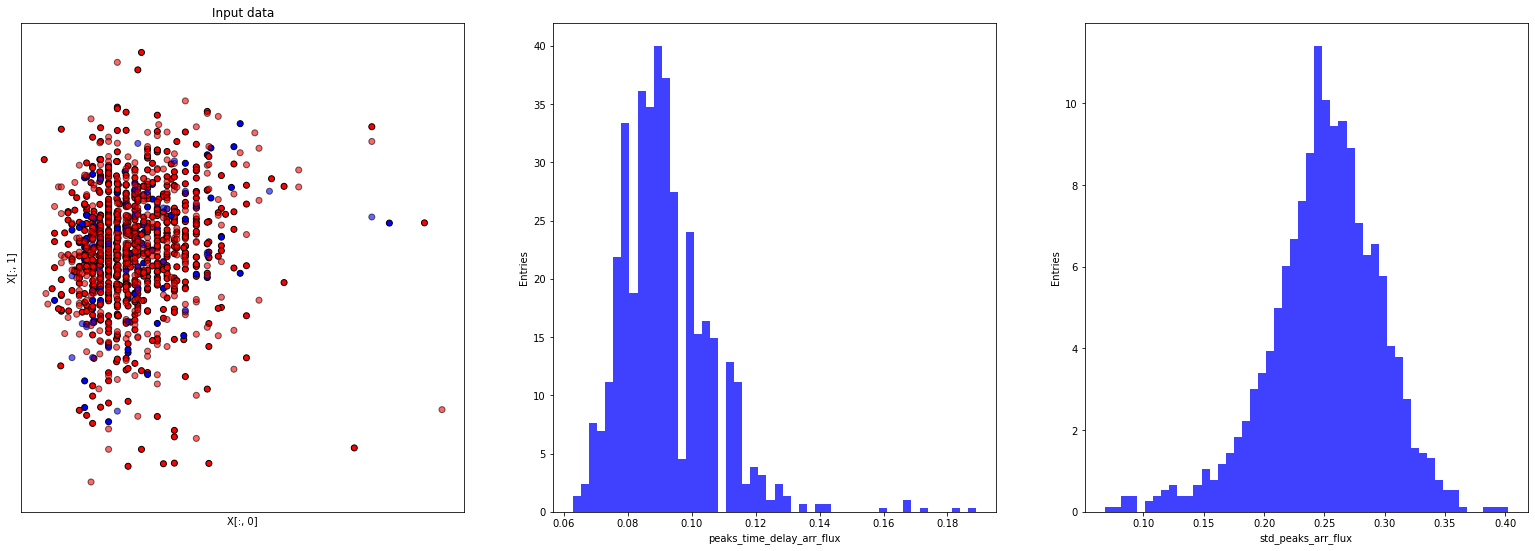

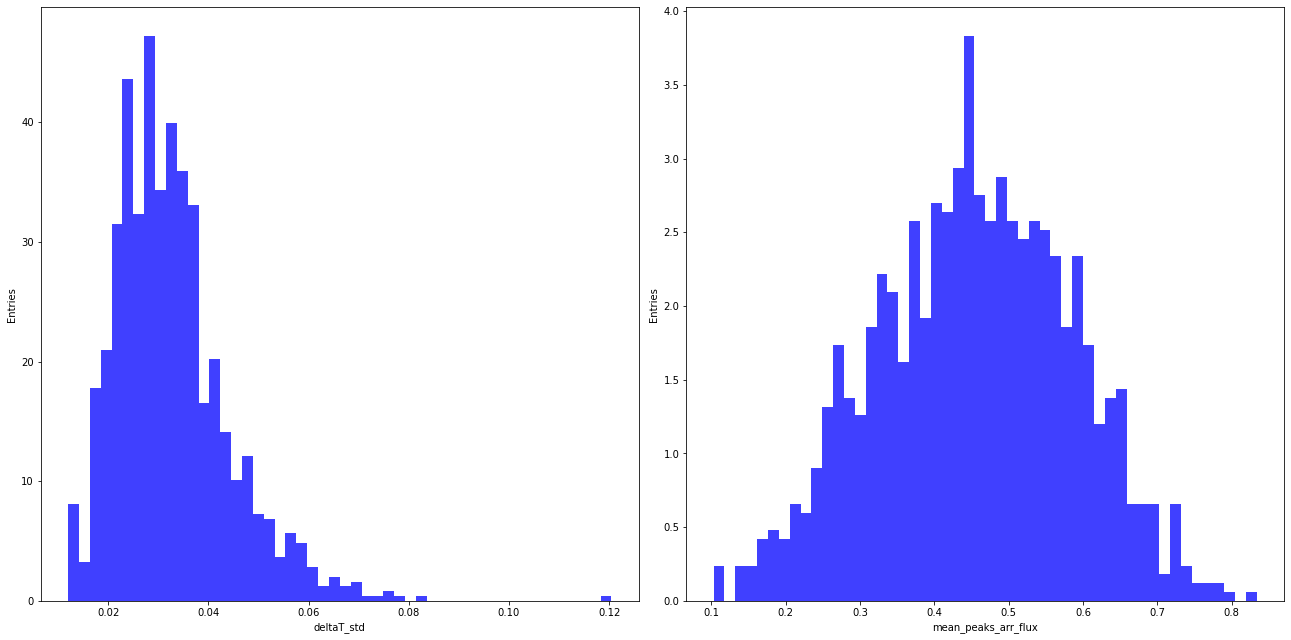

F1 score:  0.0
Precision score: 0.0


In [10]:
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.tree import export_graphviz
# import mglearn
import graphviz
fscore=[]
prec_score=[]

#Class weights values 
lgON=len(dataON)
lgOFF=len(dataOFF)
lg=lgON+lgOFF
print(lgOFF,lgON)
weight_for_0 = (1 / lgOFF) * (lg / 2.0)
weight_for_1 = (1 / lgON) * (lg / 2.0)
print(weight_for_0,weight_for_1)
class_weight = {0: weight_for_0, 1: weight_for_1}

iterations=1
#print(Labels)
#random.seed(0)

# data_matrix=np.random.permutation(data_matrix)
#print(Labels)

#for ik in range(len(Labels)):
#        print("Before ", ik, Labels[ik], data_matrix[ik])

#for i in range(10,11):
# for i in range(iterations):
# Shuffle data
from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle
data_matrix, Labels = shuffle(data_matrix, Labels, random_state=0)

#for ik in range(len(Labels)):
#        print("After:",ik,Labels[ik],data_matrix[ik])
from sklearn.preprocessing import StandardScaler

data_matrix = StandardScaler().fit_transform(data_matrix)

i=36
x_train, x_test, y_train, y_test = train_test_split(data_matrix, Labels, test_size=0.4, random_state=i)
h = .02  # step size in the mesh

x_min, x_max = data_matrix[:, 0].min() - .5, data_matrix[:, 0].max() + .5
y_min, y_max = data_matrix[:, 1].min() - .5, data_matrix[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

figure = plt.figure(figsize=(27, 9))

i=1
var=2
# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, var + 1, i)
ax.set_title("Input data")
# Plot the training points
ax.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
# Plot the testing points
ax.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
#ax.set_xscale('log')
ax.set_xlabel('X[:, 0]')
ax.set_ylabel('X[:, 1]')
i+=1

ax4 = plt.subplot(1, var + 1, i)
ax4.hist(peaks_time_delay_arr_flux, 50, density=True, facecolor='blue', alpha=0.75)
#ax4.hist(np.log10(vindex[background]), 50, density=True, facecolor='red', alpha=0.75)
ax4.set_xlabel('peaks_time_delay_arr_flux')
ax4.set_ylabel('Entries')
i+=1

ax6 = plt.subplot(1, var + 1, i)
ax6.hist(std_peaks_arr_flux, 50, density=True, facecolor='blue', alpha=0.75)
#ax6.hist((PLindex[background]), 50, density=True, facecolor='red', alpha=0.75)
ax6.set_xlabel('std_peaks_arr_flux')
ax6.set_ylabel('Entries')
i+=1

figure2 = plt.figure(figsize=(27, 9))
i=1
var=2
ax7 = plt.subplot(1, var + 1, i)
ax7.hist(deltaT_std, 50, density=True, facecolor='blue', alpha=0.75)
#ax6.hist((PLindex[background]), 50, density=True, facecolor='red', alpha=0.75)
ax7.set_xlabel('deltaT_std')
ax7.set_ylabel('Entries')
i+=1

ax8 = plt.subplot(1, var + 1, i)
ax8.hist(mean_peaks_arr_flux, 50, density=True, facecolor='blue', alpha=0.75)
#ax6.hist((PLindex[background]), 50, density=True, facecolor='red', alpha=0.75)
ax8.set_xlabel('mean_peaks_arr_flux')
ax8.set_ylabel('Entries')

plt.tight_layout()
plt.show()


#print(len(y_train),len(y_test))
#print(y_train[0],x_train[0])

model = RandomForestClassifier(n_estimators=500,
                               random_state=i,
                               class_weight = class_weight)

  
#model = MLPClassifier(solver='lbfgs', alpha=1e-5, #class_weight = class_weight,
#                      hidden_layer_sizes=(5, 2), random_state=i)
    
model.fit(x_train, y_train)
prediction= model.predict(x_test)
f1= f1_score(y_test,prediction)
score=precision_score(y_test,prediction)
fscore.append(f1)
prec_score.append(score)

    
print("F1 score: ",np.mean(fscore))
print("Precision score:",np.mean(prec_score))
# print(y_test-prediction)


In [101]:
#Decision tree for 7 features configuration
#from sklearn import tree
#class_Names=['0','1']
#features_names=['mean_arr_flux','one_two_time','NG_diff_mean_peaks_arr_flux',
#                'max_diff_mean_peaks_arr_flux','min_diff_mean_peaks_arr_flux','std_flux' ,'min_max']

#from sklearn.tree import plot_tree

#fig = plt.figure(figsize=(60, 60))
#plot_tree(model.estimators_[1], 
#          feature_names=features_names,
#          class_names=class_Names, 
#          filled=True, impurity=True, 
#          rounded=False)
#;

In [102]:
#Obtaining probability distributions of classificiation

dens = model.predict_proba(x_test)

#print(dens)

OFFF=[]
ONN=[]
idx_ON=[]
idx_OFF=[]
for i in range(len(y_test)):
    
    if y_test[i]==1:
        idx_ON.append(i)
    if y_test[i]==0:
        idx_OFF.append(i)        

         
for i in range(len(dens)):
        
        OFFF.append(dens[i][0])
        ONN.append(dens[i][1])
        
ONN_true=[ONN[j] for j in idx_ON]
OFF_true=[ONN[j] for j in idx_OFF]

print(ONN_true)


[0.092, 0.046, 0.016, 0.038, 0.244, 0.058, 0.108, 0.122, 0.016, 0.05, 0.014, 0.088, 0.048, 0.176, 0.044, 0.052, 0.248, 0.068, 0.028, 0.008, 0.064, 0.002, 0.056, 0.158, 0.138, 0.034, 0.038, 0.234, 0.156, 0.238, 0.146, 0.066, 0.036, 0.074, 0.116, 0.086, 0.428, 0.042, 0.028, 0.014, 0.174, 0.048, 0.156, 0.116, 0.058, 0.022, 0.166, 0.03, 0.012, 0.064, 0.018, 0.064]


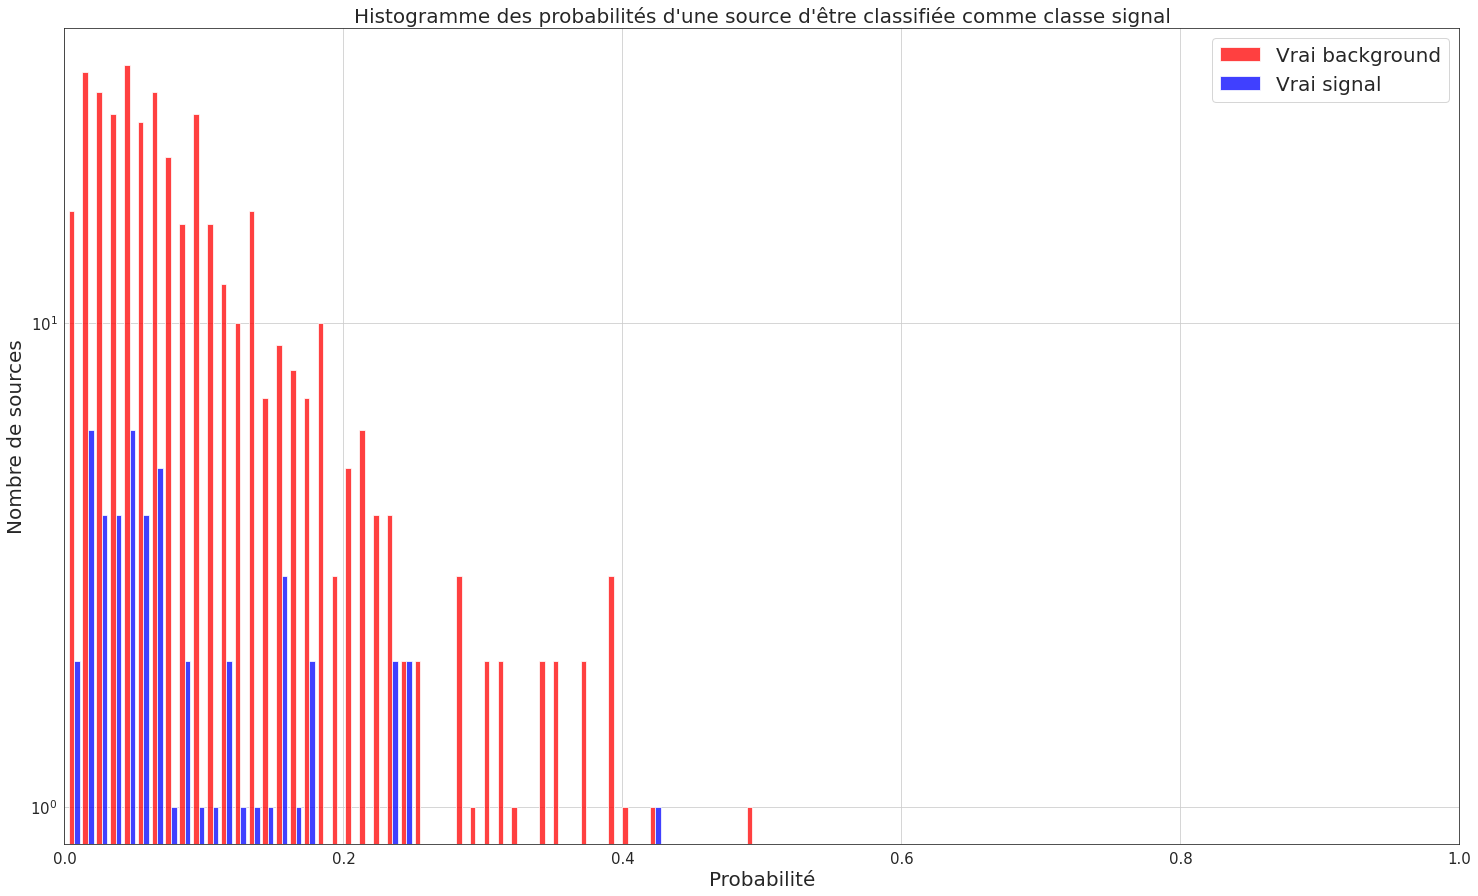

In [103]:
import seaborn as sns
sns.set_style("white")

# Plotting  model score distribution

#kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

colors = ['r','b']
labels=['Vrai background','Vrai signal']
fig = plt.figure(figsize=(25,15))
# ax1 = fig1.add_subplot(121)
plt.hist([OFF_true,ONN_true],50,color=colors,label=labels,alpha=0.75)
plt.xlabel("Probabilité",fontsize=20)
plt.ylabel("Nombre de sources",fontsize=20)
plt.title("Histogramme des probabilités d'une source d'être classifiée comme classe signal",fontsize=20)
#ax1.hist(OFF_true,20,color="r", label="Prob of being ON for all LC",density=True,alpha=0.75)
#ax1.hist(ONN_true,20,color="b", label="Prob of being ON for all LC",density=True,alpha=0.75)

#sns.distplot(ONN, color="g", label="Prob of beiung ON for all LC")
#sns.distplot(OFF_true, color="r", label="Prob of being ON for OFF LC")

plt.xlim(0,1)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#sns.distplot(ONN, color="dodgerblue", label="Prob ON")
#sns.distplot(OFFF, color="orange", label="OFF")
#plt.title("Score density")
plt.yscale('log')
#plt.xlim(0,1)
#plt.ylim(0.01,800)
plt.grid()

plt.legend(fontsize=20);

In [104]:
#model.feature_importances_

In [105]:
#feature_importances = pd.DataFrame(model.feature_importances_, index =np.arange(9),  columns=['importance']).sort_values('importance', ascending=False)

In [108]:
feature_names = [f"feature {i}" for i in range(data_matrix.shape[1])]
#importances = model.feature_importances_
#std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
#forest_importances = pd.Series(importances, index=feature_names)

#fig, ax = plt.subplots()
#forest_importances.plot.bar(yerr=std, ax=ax)
#ax.set_title("Feature importances using MDI")
#ax.set_ylabel("Mean decrease in impurity")
#fig.tight_layout()


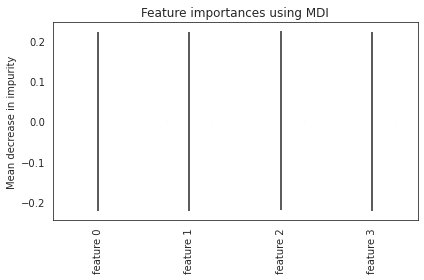

In [109]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    model, x_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
